In [2]:
import pandas as pd
import matplotlib.pyplot as plt
Z = 1.96


In [3]:
path = "../../../Risultati/Air_Quality/rf_regression_mix_outliers_none.csv"
df = pd.read_csv(path)
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,correction,imputation,r2
0,100,none,none,none,0.783063
1,100,none,none,none,0.782880
2,100,none,none,none,0.783927
3,100,none,none,none,0.784079
4,90,none,none,none,0.775378
...,...,...,...,...,...
519,50,lof,LOCF,interpolation,0.752011
520,50,hst,drop,LOCF,0.782487
521,50,hst,drop,interpolation,0.783923
522,50,hst,LOCF,LOCF,0.765558


In [4]:
df_neg = df[df['r2']<0]
df_neg

,percentage,outlier,correction,imputation,r2


In [5]:
df.loc[df['r2'] < 0, 'r2'] = 0

In [6]:
df

,percentage,outlier,correction,imputation,r2
0,100,none,none,none,0.783063
1,100,none,none,none,0.782880
2,100,none,none,none,0.783927
3,100,none,none,none,0.784079
4,90,none,none,none,0.775378
...,...,...,...,...,...
519,50,lof,LOCF,interpolation,0.752011
520,50,hst,drop,LOCF,0.782487
521,50,hst,drop,interpolation,0.783923
522,50,hst,LOCF,LOCF,0.765558


In [7]:
df_grouped = df.groupby(['outlier','correction','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                                  percentage        r2
outlier correction imputation                         
lof     drop       LOCF            70.000000  0.794170
                   interpolation   70.000000  0.792230
hst     drop       LOCF            70.000000  0.782641
                   interpolation   70.000000  0.782311
z       drop       LOCF            70.000000  0.778136
                   interpolation   70.000000  0.777769
        LOCF       LOCF            70.000000  0.770543
                   interpolation   70.000000  0.770129
none    none       none            72.727273  0.767409
hst     LOCF       LOCF            70.000000  0.766803
                   interpolation   70.000000  0.766376
lof     LOCF       interpolation   70.000000  0.759744
                   LOCF            70.000000  0.759702


In [8]:
top_performance = df[df['percentage']==100]['r2'].mean()
top_performance

0.7834874733482513

In [9]:
df['percent_diff'] = (((df['r2'] - top_performance) / top_performance) * 100).round(2)
df

,percentage,outlier,correction,imputation,r2,percent_diff
0,100,none,none,none,0.783063,-0.05
1,100,none,none,none,0.782880,-0.08
2,100,none,none,none,0.783927,0.06
3,100,none,none,none,0.784079,0.08
4,90,none,none,none,0.775378,-1.04
...,...,...,...,...,...,...
519,50,lof,LOCF,interpolation,0.752011,-4.02
520,50,hst,drop,LOCF,0.782487,-0.13
521,50,hst,drop,interpolation,0.783923,0.06
522,50,hst,LOCF,LOCF,0.765558,-2.29


In [10]:
tabella = df.groupby(['outlier','correction','imputation','percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella.sort_values(by=['outlier','correction','imputation'],ascending=False).to_csv("5_r.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier','correction','imputation'],columns='percentage',values='percent_diff').reset_index().sort_values(by=[100,90,80,70],ascending=False)
tabella.to_csv("5_r_n.csv")

In [11]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))

In [12]:
df_z_drop_locf = df[(df['outlier'] == 'z') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop_locf['CI_Min'] = df_z_drop_locf['mean'] - Z * (df_z_drop_locf['std'] / (4 ** 0.5))
df_z_drop_locf['CI_Max'] = df_z_drop_locf['mean'] + Z * (df_z_drop_locf['std'] / (4 ** 0.5))

In [13]:
df_z_locf_locf = df[(df['outlier'] == 'z') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf_locf['CI_Min'] = df_z_locf_locf['mean'] - Z * (df_z_locf_locf['std'] / (4 ** 0.5))
df_z_locf_locf['CI_Max'] = df_z_locf_locf['mean'] + Z * (df_z_locf_locf['std'] / (4 ** 0.5))

In [14]:
df_z_drop_int = df[(df['outlier'] == 'z') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop_int['CI_Min'] = df_z_drop_int['mean'] - Z * (df_z_drop_int['std'] / (4 ** 0.5))
df_z_drop_int['CI_Max'] = df_z_drop_int['mean'] + Z * (df_z_drop_int['std'] / (4 ** 0.5))

In [15]:
df_z_locf_int = df[(df['outlier'] == 'z') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf_int['CI_Min'] = df_z_locf_int['mean'] - Z * (df_z_locf_int['std'] / (4 ** 0.5))
df_z_locf_int['CI_Max'] = df_z_locf_int['mean'] + Z * (df_z_locf_int['std'] / (4 ** 0.5))

In [16]:
df_lof_drop_locf = df[(df['outlier'] == 'lof') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop_locf['CI_Min'] = df_lof_drop_locf['mean'] - Z * (df_lof_drop_locf['std'] / (4 ** 0.5))
df_lof_drop_locf['CI_Max'] = df_lof_drop_locf['mean'] + Z * (df_lof_drop_locf['std'] / (4 ** 0.5))

In [17]:
df_lof_locf_locf = df[(df['outlier'] == 'lof') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf_locf['CI_Min'] = df_lof_locf_locf['mean'] - Z * (df_lof_locf_locf['std'] / (4 ** 0.5))
df_lof_locf_locf['CI_Max'] = df_lof_locf_locf['mean'] + Z * (df_lof_locf_locf['std'] / (4 ** 0.5))

In [18]:
df_lof_drop_int = df[(df['outlier'] == 'lof') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop_int['CI_Min'] = df_lof_drop_int['mean'] - Z * (df_lof_drop_int['std'] / (4 ** 0.5))
df_lof_drop_int['CI_Max'] = df_lof_drop_int['mean'] + Z * (df_lof_drop_int['std'] / (4 ** 0.5))

In [19]:
df_lof_locf_int = df[(df['outlier'] == 'lof') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf_int['CI_Min'] = df_lof_locf_int['mean'] - Z * (df_lof_locf_int['std'] / (4 ** 0.5))
df_lof_locf_int['CI_Max'] = df_lof_locf_int['mean'] + Z * (df_lof_locf_int['std'] / (4 ** 0.5))

In [20]:
df_hst_drop_locf = df[(df['outlier'] == 'hst') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop_locf['CI_Min'] = df_hst_drop_locf['mean'] - Z * (df_hst_drop_locf['std'] / (4 ** 0.5))
df_hst_drop_locf['CI_Max'] = df_hst_drop_locf['mean'] + Z * (df_hst_drop_locf['std'] / (4 ** 0.5))

In [21]:
df_hst_locf_locf = df[(df['outlier'] == 'hst') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf_locf['CI_Min'] = df_hst_locf_locf['mean'] - Z * (df_hst_locf_locf['std'] / (4 ** 0.5))
df_hst_locf_locf['CI_Max'] = df_hst_locf_locf['mean'] + Z * (df_hst_locf_locf['std'] / (4 ** 0.5))

In [22]:
df_hst_drop_int = df[(df['outlier'] == 'hst') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop_int['CI_Min'] = df_hst_drop_int['mean'] - Z * (df_hst_drop_int['std'] / (4 ** 0.5))
df_hst_drop_int['CI_Max'] = df_hst_drop_int['mean'] + Z * (df_hst_drop_int['std'] / (4 ** 0.5))

In [23]:
df_hst_locf_int = df[(df['outlier'] == 'hst') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf_int['CI_Min'] = df_hst_locf_int['mean'] - Z * (df_hst_locf_int['std'] / (4 ** 0.5))
df_hst_locf_int['CI_Max'] = df_hst_locf_int['mean'] + Z * (df_hst_locf_int['std'] / (4 ** 0.5))

[]

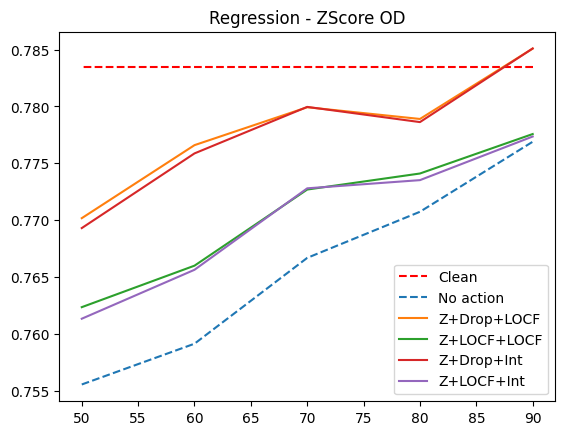

In [24]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_z_drop_locf['percentage'],df_z_drop_locf['mean'], label='Z+Drop+LOCF')
plt.plot(df_z_locf_locf['percentage'],df_z_locf_locf['mean'], label='Z+LOCF+LOCF')
plt.plot(df_z_drop_int['percentage'],df_z_drop_int['mean'], label='Z+Drop+Int')
plt.plot(df_z_locf_int['percentage'],df_z_locf_int['mean'], label='Z+LOCF+Int')
plt.title("Regression - ZScore OD")
plt.legend()
plt.plot()

[]

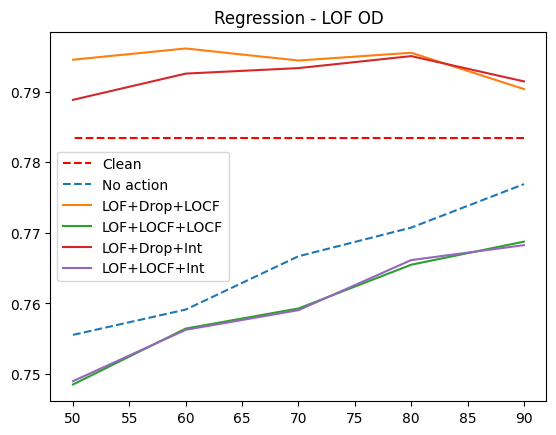

In [25]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_lof_drop_locf['percentage'],df_lof_drop_locf['mean'], label='LOF+Drop+LOCF')
plt.plot(df_lof_locf_locf['percentage'],df_lof_locf_locf['mean'], label='LOF+LOCF+LOCF')
plt.plot(df_lof_drop_int['percentage'],df_lof_drop_int['mean'], label='LOF+Drop+Int')
plt.plot(df_lof_locf_int['percentage'],df_lof_locf_int['mean'], label='LOF+LOCF+Int')
plt.title("Regression - LOF OD")
plt.legend()
plt.plot()

[]

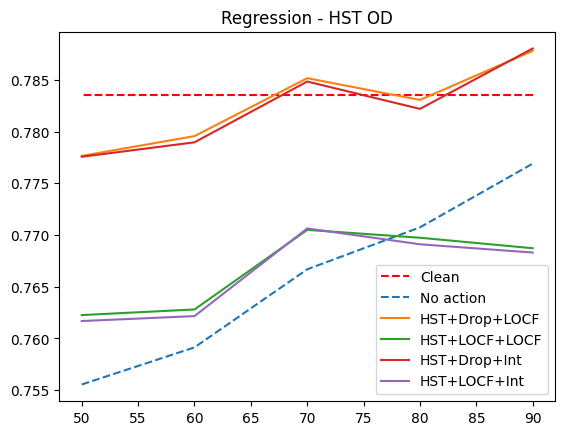

In [26]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_hst_drop_locf['percentage'],df_hst_drop_locf['mean'], label='HST+Drop+LOCF')
plt.plot(df_hst_locf_locf['percentage'],df_hst_locf_locf['mean'], label='HST+LOCF+LOCF')
plt.plot(df_hst_drop_int['percentage'],df_hst_drop_int['mean'], label='HST+Drop+Int')
plt.plot(df_hst_locf_int['percentage'],df_hst_locf_int['mean'], label='HST+LOCF+Int')
plt.title("Regression - HST OD")
plt.legend()
plt.plot()

In [27]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))

In [28]:
df_z_drop_locf = df[(df['outlier'] == 'z') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_drop_locf['CI_Min'] = df_z_drop_locf['mean'] - Z * (df_z_drop_locf['std'] / (4 ** 0.5))
df_z_drop_locf['CI_Max'] = df_z_drop_locf['mean'] + Z * (df_z_drop_locf['std'] / (4 ** 0.5))

In [29]:
df_z_locf_locf = df[(df['outlier'] == 'z') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_locf_locf['CI_Min'] = df_z_locf_locf['mean'] - Z * (df_z_locf_locf['std'] / (4 ** 0.5))
df_z_locf_locf['CI_Max'] = df_z_locf_locf['mean'] + Z * (df_z_locf_locf['std'] / (4 ** 0.5))

In [30]:
df_z_drop_int = df[(df['outlier'] == 'z') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_drop_int['CI_Min'] = df_z_drop_int['mean'] - Z * (df_z_drop_int['std'] / (4 ** 0.5))
df_z_drop_int['CI_Max'] = df_z_drop_int['mean'] + Z * (df_z_drop_int['std'] / (4 ** 0.5))

In [31]:
df_z_locf_int = df[(df['outlier'] == 'z') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_locf_int['CI_Min'] = df_z_locf_int['mean'] - Z * (df_z_locf_int['std'] / (4 ** 0.5))
df_z_locf_int['CI_Max'] = df_z_locf_int['mean'] + Z * (df_z_locf_int['std'] / (4 ** 0.5))

In [32]:
df_lof_drop_locf = df[(df['outlier'] == 'lof') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_drop_locf['CI_Min'] = df_lof_drop_locf['mean'] - Z * (df_lof_drop_locf['std'] / (4 ** 0.5))
df_lof_drop_locf['CI_Max'] = df_lof_drop_locf['mean'] + Z * (df_lof_drop_locf['std'] / (4 ** 0.5))

In [33]:
df_lof_locf_locf = df[(df['outlier'] == 'lof') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_locf_locf['CI_Min'] = df_lof_locf_locf['mean'] - Z * (df_lof_locf_locf['std'] / (4 ** 0.5))
df_lof_locf_locf['CI_Max'] = df_lof_locf_locf['mean'] + Z * (df_lof_locf_locf['std'] / (4 ** 0.5))

In [34]:
df_lof_drop_int = df[(df['outlier'] == 'lof') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_drop_int['CI_Min'] = df_lof_drop_int['mean'] - Z * (df_lof_drop_int['std'] / (4 ** 0.5))
df_lof_drop_int['CI_Max'] = df_lof_drop_int['mean'] + Z * (df_lof_drop_int['std'] / (4 ** 0.5))

In [35]:
df_lof_locf_int = df[(df['outlier'] == 'lof') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_locf_int['CI_Min'] = df_lof_locf_int['mean'] - Z * (df_lof_locf_int['std'] / (4 ** 0.5))
df_lof_locf_int['CI_Max'] = df_lof_locf_int['mean'] + Z * (df_lof_locf_int['std'] / (4 ** 0.5))

In [36]:
df_hst_drop_locf = df[(df['outlier'] == 'hst') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_drop_locf['CI_Min'] = df_hst_drop_locf['mean'] - Z * (df_hst_drop_locf['std'] / (4 ** 0.5))
df_hst_drop_locf['CI_Max'] = df_hst_drop_locf['mean'] + Z * (df_hst_drop_locf['std'] / (4 ** 0.5))

In [37]:
df_hst_locf_locf = df[(df['outlier'] == 'hst') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_locf_locf['CI_Min'] = df_hst_locf_locf['mean'] - Z * (df_hst_locf_locf['std'] / (4 ** 0.5))
df_hst_locf_locf['CI_Max'] = df_hst_locf_locf['mean'] + Z * (df_hst_locf_locf['std'] / (4 ** 0.5))

In [38]:
df_hst_drop_int = df[(df['outlier'] == 'hst') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_drop_int['CI_Min'] = df_hst_drop_int['mean'] - Z * (df_hst_drop_int['std'] / (4 ** 0.5))
df_hst_drop_int['CI_Max'] = df_hst_drop_int['mean'] + Z * (df_hst_drop_int['std'] / (4 ** 0.5))

In [39]:
df_hst_locf_int = df[(df['outlier'] == 'hst') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_locf_int['CI_Min'] = df_hst_locf_int['mean'] - Z * (df_hst_locf_int['std'] / (4 ** 0.5))
df_hst_locf_int['CI_Max'] = df_hst_locf_int['mean'] + Z * (df_hst_locf_int['std'] / (4 ** 0.5))

[]

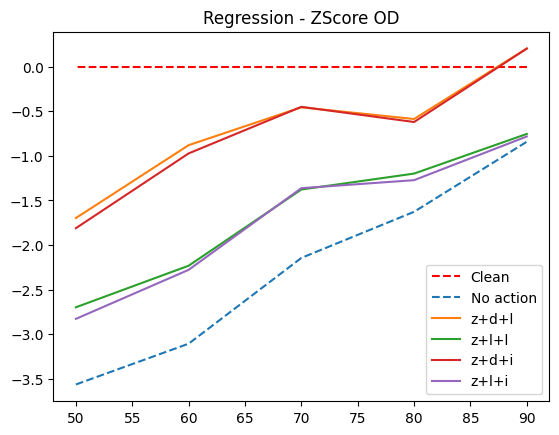

In [40]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_z_drop_locf['percentage'],df_z_drop_locf['mean'], label='z+d+l')
plt.plot(df_z_locf_locf['percentage'],df_z_locf_locf['mean'], label='z+l+l')
plt.plot(df_z_drop_int['percentage'],df_z_drop_int['mean'], label='z+d+i')
plt.plot(df_z_locf_int['percentage'],df_z_locf_int['mean'], label='z+l+i')
plt.title("Regression - ZScore OD")
plt.legend()
plt.plot()

[]

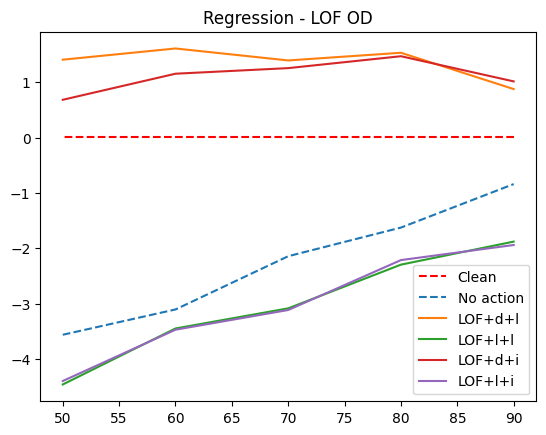

In [41]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_lof_drop_locf['percentage'],df_lof_drop_locf['mean'], label='LOF+d+l')
plt.plot(df_lof_locf_locf['percentage'],df_lof_locf_locf['mean'], label='LOF+l+l')
plt.plot(df_lof_drop_int['percentage'],df_lof_drop_int['mean'], label='LOF+d+i')
plt.plot(df_lof_locf_int['percentage'],df_lof_locf_int['mean'], label='LOF+l+i')
plt.title("Regression - LOF OD")
plt.legend()
plt.plot()

[]

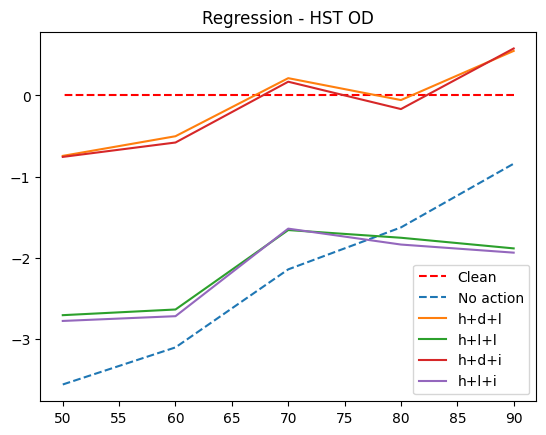

In [42]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_hst_drop_locf['percentage'],df_hst_drop_locf['mean'], label='h+d+l')
plt.plot(df_hst_locf_locf['percentage'],df_hst_locf_locf['mean'], label='h+l+l')
plt.plot(df_hst_drop_int['percentage'],df_hst_drop_int['mean'], label='h+d+i')
plt.plot(df_hst_locf_int['percentage'],df_hst_locf_int['mean'], label='h+l+i')
plt.title("Regression - HST OD")
plt.legend()
plt.plot()